In [34]:
# import the dependencies
import tensorflow as tf
from tensorflow.keras import datasets, models,layers
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# load and prepare the data
(train_images, train_labels),(test_images, test_labels)= datasets.fashion_mnist.load_data()

In [36]:

train_images.shape

(60000, 28, 28)

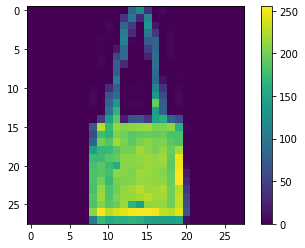

In [37]:
plt.figure
plt.imshow(train_images[200])
plt.colorbar()
plt.grid(False)
plt.show()

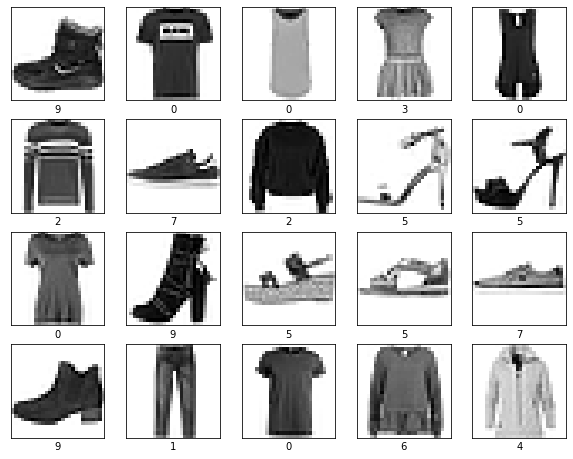

In [38]:
plt.figure(figsize=(10,10))
for i in range(20):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(True)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(train_labels[i])
plt.show()

In [39]:
# reshape and normalize the image
train_images=train_images.reshape(-1,28,28,1).astype('float32')/255
test_images=test_images.reshape(-1,28,28,1).astype('float32')/255

In [40]:
train_images.shape, test_images.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [41]:
train_labels=train_labels.astype('float32')
test_labels=test_labels.astype('float32')

In [42]:
train_labels.shape, test_labels.shape

((60000,), (10000,))

In [43]:
train_images=train_images[:-10000]
train_labels=train_labels[:-10000]
val_images=train_images[-10000:]
val_labels=train_labels[-10000:]

In [44]:
val_images.shape

(10000, 28, 28, 1)

In [47]:
# built the model
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPool2D(2,2))

In [48]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                346176    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 347,146
Trainable params: 347,146
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                346176    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 347,146
Trainable params: 347,146
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.fit(train_images,train_labels,epochs=10,validation_data=(val_images,val_labels))

Epoch 1/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.4240 - accuracy: 0.8506 - val_loss: 0.3197 - val_accuracy: 0.8802
Epoch 2/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.2851 - accuracy: 0.8971 - val_loss: 0.2556 - val_accuracy: 0.9083
Epoch 3/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.2425 - accuracy: 0.9118 - val_loss: 0.2142 - val_accuracy: 0.9248
Epoch 4/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.2120 - accuracy: 0.9229 - val_loss: 0.1849 - val_accuracy: 0.9344
Epoch 5/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.1866 - accuracy: 0.9309 - val_loss: 0.1785 - val_accuracy: 0.9347
Epoch 6/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.1661 - accuracy: 0.9388 - val_loss: 0.1599 - val_accuracy: 0.9393
Epoch 7/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.1448 - accuracy: 0.9462 - val_loss: 0.1137 -

In [54]:
#evaluating the model
test_loss, test_acc=model.evaluate(test_images,test_labels, verbose=2)

313/313 - 2s - loss: 0.3231 - accuracy: 0.9064
